# Chatbot with Langgraph (Graph API)

In [35]:
from typing import Annotated
from typing_extensions import TypedDict
from pprint import pprint
from langchain_openai import AzureChatOpenAI

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages # Also called Reducers - It's function is to add messages to a dict. It keeps track of the messages in the conversation. 


In [36]:
class State(TypedDict):
    # Messages have the type "list". The "add_messages" function in the annotation is used to add messages to the state.
    # In this case, it appends the messages to the list rather than overwriting them.

    messages: Annotated[list, add_messages] 
    # Annotated helps classify the input as Human message and output as AI message. It adds 'HumanMessage' annoctation to input and 'AIMessage' annotation to output.

In [37]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [38]:
llm = AzureChatOpenAI(
        azure_endpoint="https://sparkapi.spglobal.com/v1/sparkassist",
        azure_deployment="gpt-4o-mini",
        openai_api_version="2024-02-01",
        api_key=os.getenv("SPARK_API_TOKEN")
    )


In [39]:
llm.invoke("What is (80*40)+200 ?")

AIMessage(content='To calculate \\((80 \\times 40) + 200\\):\n\n1. First, calculate \\(80 \\times 40\\):\n   \\[\n   80 \\times 40 = 3200\n   \\]\n\n2. Next, add 200 to the result:\n   \\[\n   3200 + 200 = 3400\n   \\]\n\nSo, \\((80 \\times 40) + 200 = 3400\\).', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 95, 'prompt_tokens': 16, 'total_tokens': 111, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_efad92c60b', 'id': 'chatcmpl-CHA4e4LHJAilEcYQt2Rysbg5ezsii', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'f

In [40]:
from langchain_core.messages import AIMessage

# Node to handle the chatbot interaction
def chatbot(state: State):
    # Get the last message from the state
    last_message = state["messages"][-1]
    # Get response from LLM (AzureChatOpenAI returns AIMessage directly)
    response = llm.invoke([last_message])
    # Return the updated state with the new message
    return {"messages": [response]}

In [41]:
# Defining the graph

graph_builder = StateGraph(State)

# Adding Node to the graph
graph_builder.add_node("llmchatbot", chatbot) # (node_name, function_name)


# Add edges
graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot", END)

# Compile the graph
graph = graph_builder.compile()

In [42]:
mermaid_code = graph.get_graph().draw_mermaid()
print("Copy the following code to https://mermaid.live/ for visualization:\n")
print(mermaid_code)

Copy the following code to https://mermaid.live/ for visualization:

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	llmchatbot(llmchatbot)
	__end__([<p>__end__</p>]):::last
	__start__ --> llmchatbot;
	llmchatbot --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



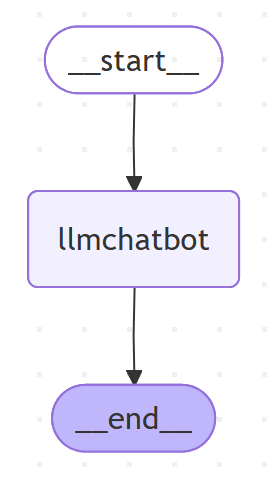

In [43]:
# Visualization of graph
try:
    print("Graph Structure (ASCII):")
    print(graph.get_graph().draw_ascii())
except Exception as e:
    print(f"Visualization error: {e}")
    print("\nBasic Graph Info:")
    print(f"Nodes: {list(graph.get_graph().nodes)}")
    print(f"Edges: {list(graph.get_graph().edges)}")

Graph Structure (ASCII):
Visualization error: Install grandalf to draw graphs: `pip install grandalf`.

Basic Graph Info:
Nodes: ['__start__', 'llmchatbot', '__end__']
Edges: [Edge(source='__start__', target='llmchatbot', data=None, conditional=False), Edge(source='llmchatbot', target='__end__', data=None, conditional=False)]


In [44]:
from langchain_core.messages import HumanMessage
response = graph.invoke({"messages": [HumanMessage(content="What is the capital of France?")]})

In [45]:
response

{'messages': [HumanMessage(content='What is the capital of France?', additional_kwargs={}, response_metadata={}, id='fda36059-8745-406e-abab-9d439c3e8086'),
  AIMessage(content='The capital of France is Paris.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 14, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_efad92c60b', 'id': 'chatcmpl-CHA4gNUod19w3OKsO328xJfdn4UnX', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'fi

In [46]:
response["messages"][-1] # Get the last message in the conversation

AIMessage(content='The capital of France is Paris.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 14, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_efad92c60b', 'id': 'chatcmpl-CHA4gNUod19w3OKsO328xJfdn4UnX', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 

In [47]:
response["messages"][-1].content  # This will give you the response from the chatbot

'The capital of France is Paris.'

In [48]:
from langchain_core.messages import HumanMessage

for event in graph.stream({"messages": [HumanMessage(content="What is the capital of France?")]}):
    pprint(event)  # It prints both human and AI messages as they are generated

{'llmchatbot': {'messages': [AIMessage(content='The capital of France is Paris.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 14, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_efad92c60b', 'id': 'chatcmpl-CHA4iaYdY0YYWWNxuT2VP00e3MUDb', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered':

In [49]:
for event in graph.stream({"messages": [HumanMessage(content="What is the capital of France?")]}):
    for value in event.values():
        pprint(value["messages"][-1].content)  # This will give you the response from the chatbot

'The capital of France is Paris.'


# Chatbot with Tools

In [50]:
# Defining a tool function
def multiply(a: int, b: int) -> int:
    
    # Adding a docstring to explain the function
    """ Multiplies two integers and returns the result.

    Args:
        a (int): The first integer.
        b (int): The second integer.
    
    Returns:
        int: The product of the two integers.
    """
    return a * b

In [51]:
# Defining the another tool
def add(a: int, b: int) -> int:
    
    # Adding a docstring to explain the function
    """ Adds two integers and returns the result.

    Args:
        a (int): The first integer.
        b (int): The second integer.
    
    Returns:
        int: The sum of the two integers.
    """
    return a + b

In [52]:
tools=[multiply, add]

In [53]:
llm_with_tools = llm.bind_tools(tools)

In [54]:
llm_with_tools

RunnableBinding(bound=AzureChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000001B170BDF7C0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001B1710598D0>, root_client=<openai.lib.azure.AzureOpenAI object at 0x000001B170BDF040>, root_async_client=<openai.lib.azure.AsyncAzureOpenAI object at 0x000001B170BDED10>, model_kwargs={}, openai_api_key=SecretStr('**********'), disabled_params={'parallel_tool_calls': None}, azure_endpoint='https://sparkapi.spglobal.com/v1/sparkassist', deployment_name='gpt-4o-mini', openai_api_version='2024-02-01', openai_api_type='azure'), kwargs={'tools': [{'type': 'function', 'function': {'name': 'multiply', 'description': 'Multiplies two integers and returns the result.', 'parameters': {'properties': {'a': {'description': 'The first integer.', 'type': 'integer'}, 'b': {'description': 'The second integer.', 'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'

# ReAct - Reason + Act 

In [55]:
## StateGraph with tools

from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Function to handle LLM with tools
def tool_calling_llm(state: State):
    messages = state["messages"]
    response = llm_with_tools.invoke(messages)
    return {"messages": [response]}

# Creates a new graph object called builder using the StateGraph class, 
# with the state type defined by State. This graph will manage the flow of your chatbot logic.
builder=StateGraph(State)

## Adding nodes to the graph
builder.add_node("llmchat_withtools",tool_calling_llm) # Node for LLM with tools
builder.add_node("tools", ToolNode(tools)) # Node for tools


## Add edges
builder.add_edge(START, "llmchat_withtools")
builder.add_conditional_edges(
    "llmchat_withtools",
    # If tools are needed, go to tools node, else go to END
    tools_condition
)
builder.add_edge("tools", END)

# complie the graph
graph_with_tools = builder.compile()


In [56]:
# Visualization of graph
try:
    print("Graph Structure (ASCII):")
    print(graph_with_tools.get_graph().draw_ascii())
except Exception as e:
    print(f"Visualization error: {e}")
    print("\nBasic Graph Info:")
    print(f"Nodes: {list(graph_with_tools.get_graph().nodes)}")
    print(f"Edges: {list(graph_with_tools.get_graph().edges)}")

Graph Structure (ASCII):
Visualization error: Install grandalf to draw graphs: `pip install grandalf`.

Basic Graph Info:
Nodes: ['__start__', 'llmchat_withtools', 'tools', '__end__']
Edges: [Edge(source='__start__', target='llmchat_withtools', data=None, conditional=False), Edge(source='llmchat_withtools', target='__end__', data=None, conditional=True), Edge(source='llmchat_withtools', target='tools', data=None, conditional=True), Edge(source='tools', target='__end__', data=None, conditional=False)]


In [57]:
mermaid_code = graph_with_tools.get_graph().draw_mermaid()
print("Copy the following code to https://mermaid.live/ for visualization:\n")
print(mermaid_code)

Copy the following code to https://mermaid.live/ for visualization:

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	llmchat_withtools(llmchat_withtools)
	tools(tools)
	__end__([<p>__end__</p>]):::last
	__start__ --> llmchat_withtools;
	llmchat_withtools -.-> __end__;
	llmchat_withtools -.-> tools;
	tools --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



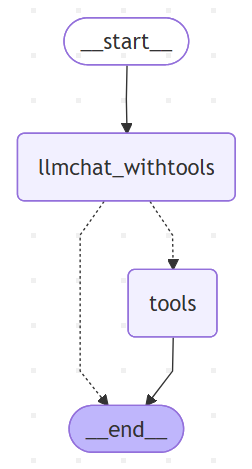

In [58]:
response1 = graph_with_tools.invoke({"messages": [HumanMessage(content="What is (80*40)+200 ?")]})

In [59]:
for m in response1["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is (80*40)+200 ?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_vU2zs6sUQvb57gAdd1ZzkV2U)
 Call ID: call_vU2zs6sUQvb57gAdd1ZzkV2U
  Args:
    a: 80
    b: 40
  add (call_tn6cPY9VvJRfpukPzwOvw571)
 Call ID: call_tn6cPY9VvJRfpukPzwOvw571
  Args:
    a: 200
    b: 0
================================= Tool Message =================================
Name: multiply

3200
================================= Tool Message =================================
Name: add

200


In [60]:
response2 = graph_with_tools.invoke({"messages": [HumanMessage(content="what is capital of India and what is 25 multiplied by 8 and what is the capital of france ?")]})

for m in response2["messages"]:
    m.pretty_print()


================================ Human Message =================================

what is capital of India and what is 25 multiplied by 8 and what is the capital of france ?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_3iTZV304WVVGqWGrrRf7BZ5Z)
 Call ID: call_3iTZV304WVVGqWGrrRf7BZ5Z
  Args:
    a: 25
    b: 8
  add (call_lDLfSZuyTEx1PqMe47swLWUL)
 Call ID: call_lDLfSZuyTEx1PqMe47swLWUL
  Args:
    a: 0
    b: 0
================================= Tool Message =================================
Name: multiply

200
================================= Tool Message =================================
Name: add

0


In [61]:
response2["messages"][-1].content  # This will give you the response from the chatbot

'0'

The output only came from tools and not from LLM about capital of India, because the tool call was made but the other part did not happen because the context did not go back to chatbot. 

In [62]:
## StateGraph with tools

from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Function to handle LLM with tools
def tool_calling_llm(state: State):
    messages = state["messages"]
    response = llm_with_tools.invoke(messages)
    return {"messages": [response]}

# Creates a new graph object called builder using the StateGraph class, 
# with the state type defined by State. This graph will manage the flow of your chatbot logic.
builder=StateGraph(State)

## Adding nodes to the graph
builder.add_node("llmchat_withtools",tool_calling_llm) # Node for LLM with tools
builder.add_node("tools", ToolNode(tools)) # Node for tools


## Add edges
builder.add_edge(START, "llmchat_withtools")
builder.add_conditional_edges(
    "llmchat_withtools",
    # If tools are needed, go to tools node, else go to END
    tools_condition
)
builder.add_edge("tools", "llmchat_withtools") # Added edge from tools back to llmchat_withtools



# compile the graph
graph_with_tools = builder.compile()

In [63]:
mermaid_code = graph_with_tools.get_graph().draw_mermaid()
print("Copy the following code to https://mermaid.live/ for visualization:\n")
print(mermaid_code)

Copy the following code to https://mermaid.live/ for visualization:

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	llmchat_withtools(llmchat_withtools)
	tools(tools)
	__end__([<p>__end__</p>]):::last
	__start__ --> llmchat_withtools;
	llmchat_withtools -.-> __end__;
	llmchat_withtools -.-> tools;
	tools --> llmchat_withtools;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



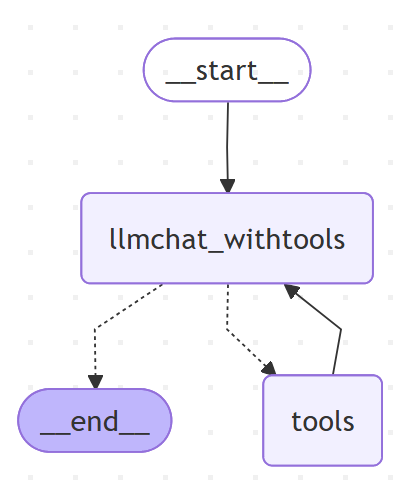

In [64]:
response3 = graph_with_tools.invoke({"messages": [HumanMessage(content="what is capital of India and what is (80*40)+200 ?")]})

for m in response3["messages"]:
    m.pretty_print()

================================ Human Message =================================

what is capital of India and what is (80*40)+200 ?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_UXg5h43OqRBQDnN0tlbZcRWI)
 Call ID: call_UXg5h43OqRBQDnN0tlbZcRWI
  Args:
    a: 80
    b: 40
  add (call_Sq2zu16tP4fWBUVRhmnZuMWL)
 Call ID: call_Sq2zu16tP4fWBUVRhmnZuMWL
  Args:
    a: 3200
    b: 200
================================= Tool Message =================================
Name: multiply

3200
================================= Tool Message =================================
Name: add

3400
================================== Ai Message ==================================

The capital of India is New Delhi. The result of the expression \( (80 \times 40) + 200 \) is \( 3400 \).


# Adding Memory to the Graph

In [31]:
response4 = graph_with_tools.invoke({"messages": [HumanMessage(content="Hi my name is Kartikeya!")]})

for m in response4["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hi my name is Kartikeya!
================================== Ai Message ==================================

Hello Kartikeya! How can I assist you today?


In [32]:
response5 = graph_with_tools.invoke({"messages": [HumanMessage(content="What is my name!")]})

for m in response5["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is my name!
================================== Ai Message ==================================

I don't know your name. You haven't shared it with me yet. If you'd like to tell me your name, I'd be happy to remember it for our conversation!


## Now trying again post adding memory to the graph

In [35]:
## StateGraph with tools

from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Additional imports for memory
from langgraph.checkpoint.memory import MemorySaver

# Memory saver instance
memory = MemorySaver()

## Node Definition
def tool_calling_llm(state: State):
    messages = state["messages"]
    response = llm_with_tools.invoke(messages)
    return {"messages": [response]}

# Creates a new graph object called builder using the StateGraph class, 
# with the state type defined by State. This graph will manage the flow of your chatbot logic.
builder=StateGraph(State)

## Adding nodes to the graph
builder.add_node("llmchat_withtools",tool_calling_llm) # Node for LLM with tools
builder.add_node("tools", ToolNode(tools)) # Node for tools


## Add edges
builder.add_edge(START, "llmchat_withtools")
builder.add_conditional_edges(
    "llmchat_withtools",
    # If tools are needed, go to tools node, else go to END
    tools_condition
)
builder.add_edge("tools", "llmchat_withtools") # Added edge from tools back to llmchat_withtools



# compile the graph
graph_with_tools = builder.compile(checkpointer=memory) # Added memory to the graph

In [36]:
# Create a thread for memory session
config = {"configurable":{"thread_id":"chat_thread_1"}}

response6 = graph_with_tools.invoke({"messages": [HumanMessage(content="My name is Kartikeya!")]}, config=config)

for m in response6["messages"]:
    m.pretty_print()

================================ Human Message =================================

My name is Kartikeya!
================================== Ai Message ==================================

Hello, Kartikeya! How can I assist you today?


In [37]:
response7 = graph_with_tools.invoke({"messages": [HumanMessage(content="What is my name?")]}, config=config)

for m in response7["messages"]:
    m.pretty_print()

================================ Human Message =================================

My name is Kartikeya!
================================== Ai Message ==================================

Hello, Kartikeya! How can I assist you today?
================================ Human Message =================================

What is my name?
================================== Ai Message ==================================

Your name is Kartikeya.
